Plant Leaf Disease Detection

Importing Libraries

In [10]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Load data into Train and Test Variables

In [2]:
train_dir = "New Plant Diseases Dataset/train"
test_dir = "New Plant Diseases Dataset/valid"

Creating function to count images in each dataset       

In [3]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
70295 Train images
17572 Test images


Preprocessing data

In [5]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


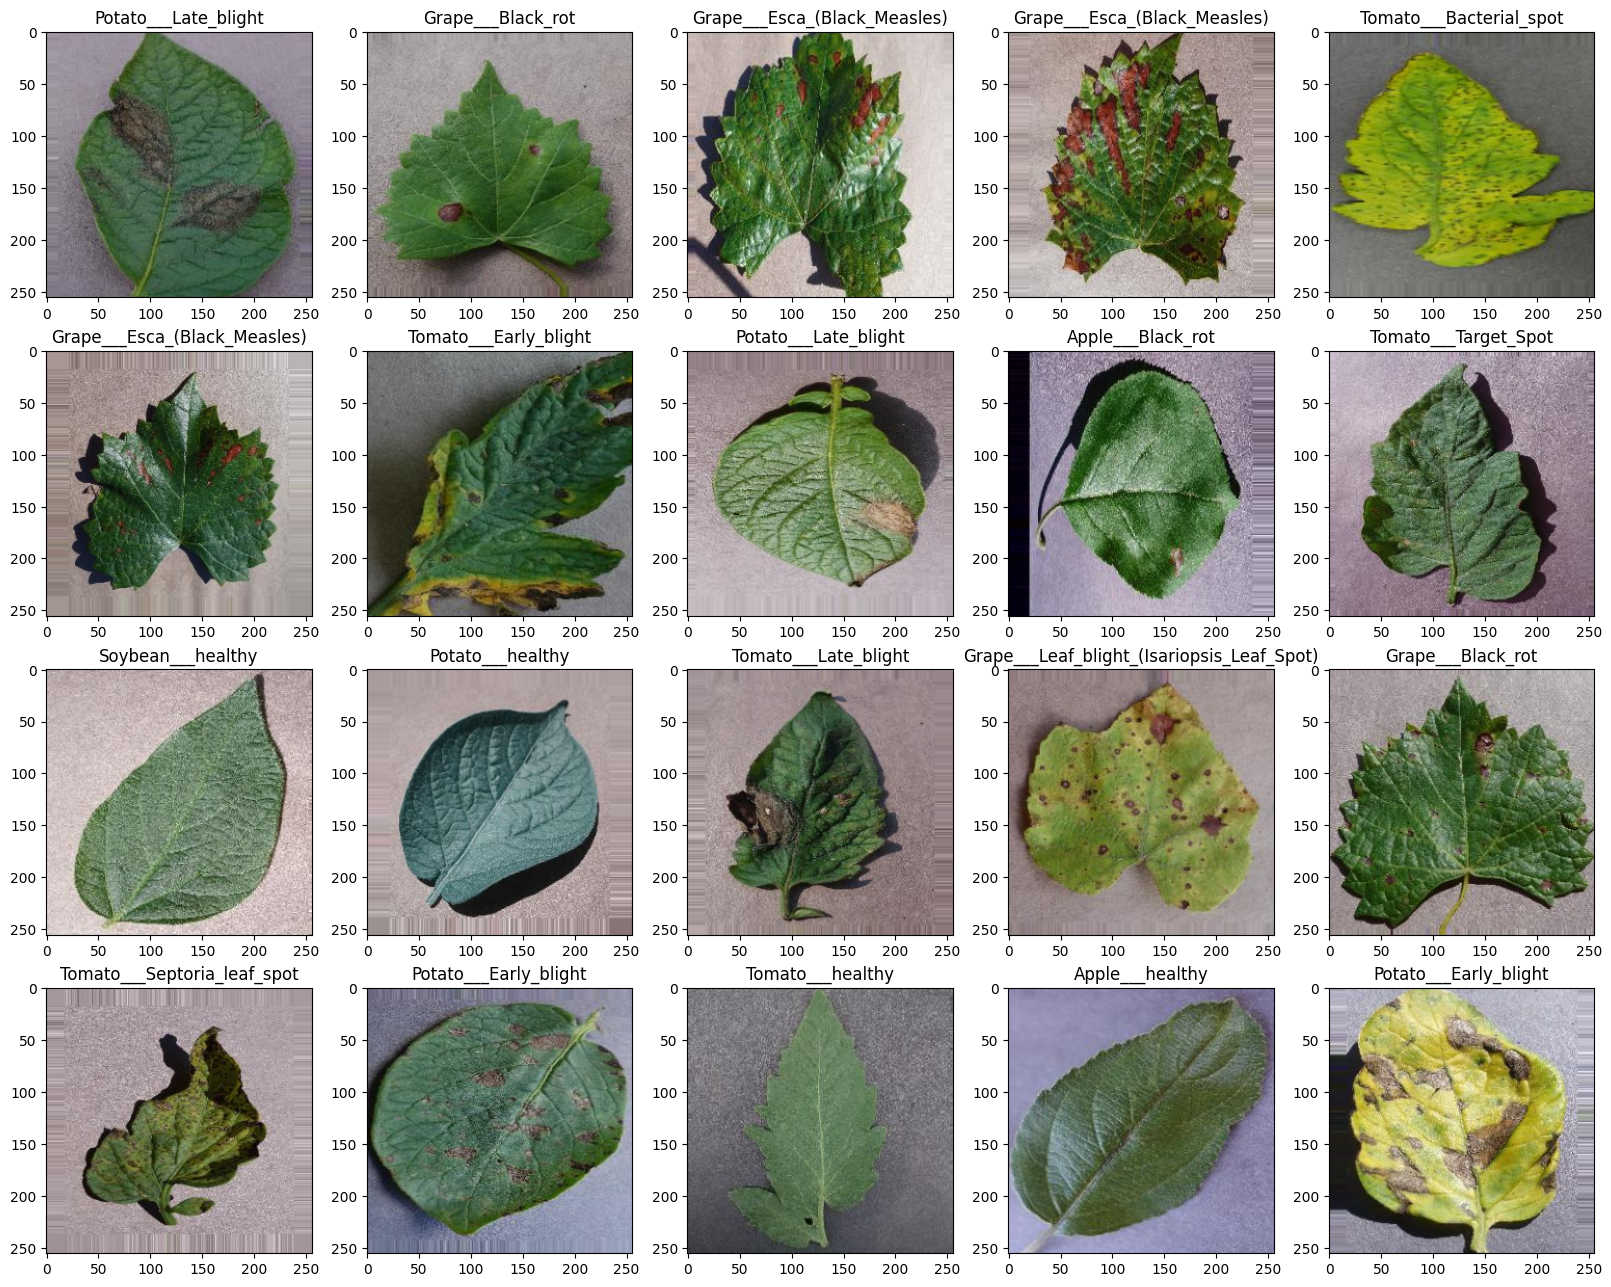

In [11]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    for i in range(0,20):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

In [12]:
diseases = os.listdir(train_dir)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class


no. of images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___healthy                                              1692
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___Bacterial_spot                                       1838
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Pepper,_bell___healthy                                       1988
Potato___Early_blight                                        1939
Potato___healthy                                             1824
Potato___Late_blight                                         1939
Raspberry___healthy                                          1781
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Strawberry___healthy                                         1824
Strawberry___Leaf_scorch                                     1774
Tomato___Bacterial_spot                                      1702
Tomato___Early_blight                                        1920
Tomato___healthy                                             1926
Tomato___Late_blight                                         1851
Tomato___Leaf_Mold                                           1882
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Target_Spot                                         1827
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961

Text(0.5, 1.0, 'Images per each class of plant disease')

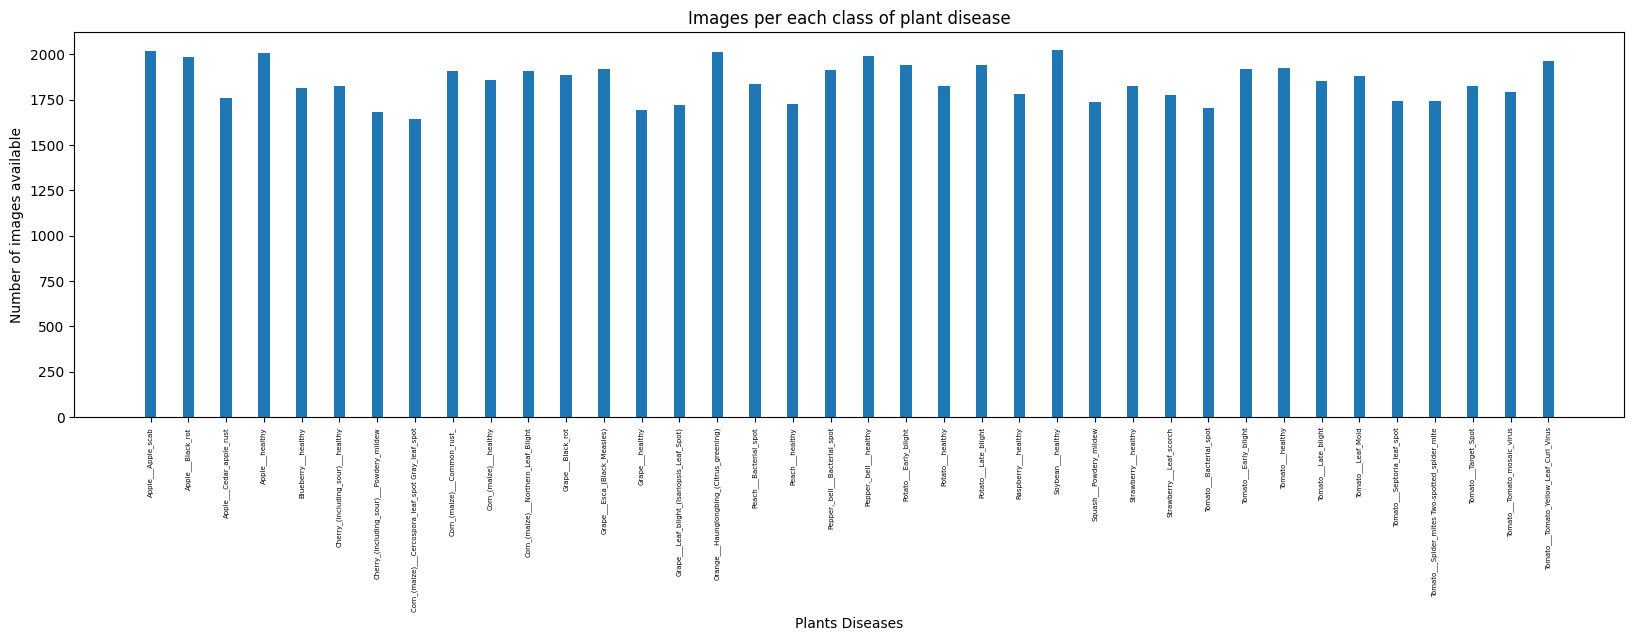

In [13]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants Diseases', fontsize=10)
plt.ylabel('Number of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

CNN Parameter Building

In [14]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [15]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


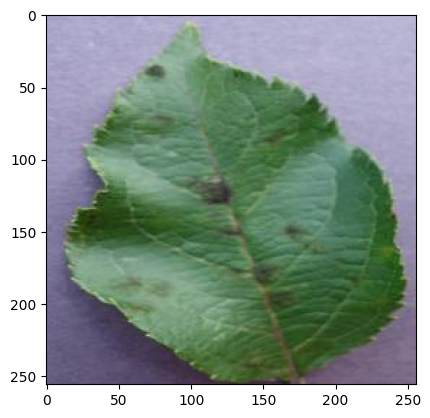

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img1 = image.load_img("New Plant Diseases Dataset/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")
plt.imshow(img1);

# preprocess image
img1 = image.load_img("New Plant Diseases Dataset/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG", target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


Visualizing The Image After Every Layer

1/1 [==============================] - 0s 385ms/step


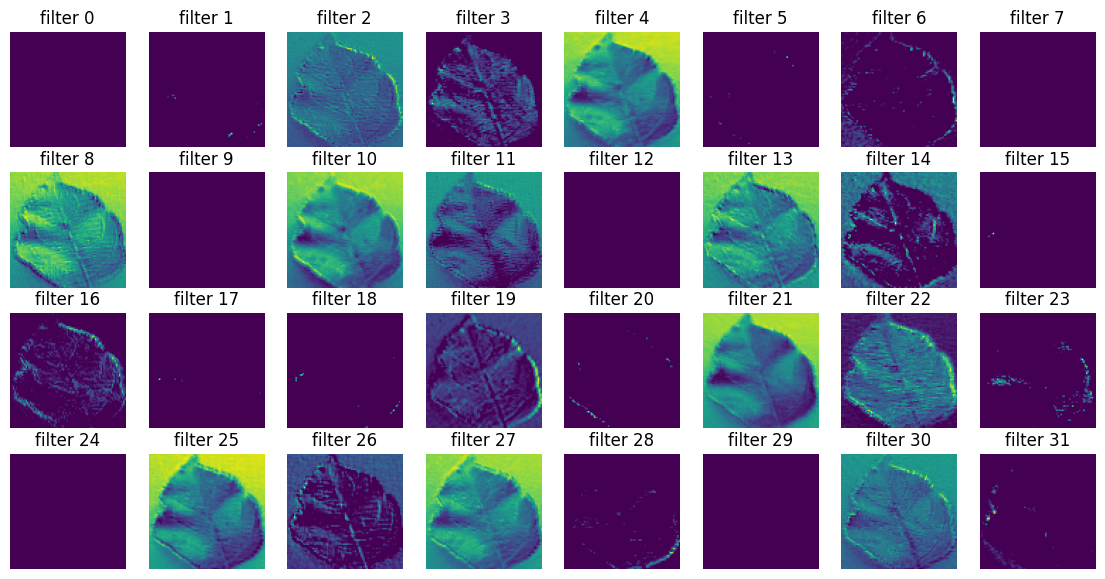

In [24]:
import matplotlib.pyplot as plt

# Assuming you have extracted the features from the 'conv2d_1' layer
conv2d_1_features = conv2d_1_output.predict(img)

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 4
for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    plt.axis('off')
    plt.title('filter ' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')  # Visualizing in color mode.
plt.show()


Training The Model

In [27]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 70295 images belonging to 38 classes.


In [29]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
train = model.fit(train_generator,
                  epochs=15,
                  steps_per_epoch=train_generator.samples // batch_size,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples // batch_size,
                  verbose=1)


Epoch 1/15
2196/2196 [==============================] - 3403s 2s/step - loss: 1.3596 - accuracy: 0.5967 - val_loss: 0.5486 - val_accuracy: 0.8257
Epoch 2/15
2196/2196 [==============================] - 3107s 1s/step - loss: 0.4964 - accuracy: 0.8405 - val_loss: 0.2699 - val_accuracy: 0.9126
Epoch 3/15
2196/2196 [==============================] - 2916s 1s/step - loss: 0.3511 - accuracy: 0.8890 - val_loss: 0.3182 - val_accuracy: 0.8969
Epoch 4/15
2196/2196 [==============================] - 3389s 2s/step - loss: 0.2897 - accuracy: 0.9067 - val_loss: 0.1390 - val_accuracy: 0.9543
Epoch 5/15
2196/2196 [==============================] - 4537s 2s/step - loss: 0.2442 - accuracy: 0.9200 - val_loss: 0.1506 - val_accuracy: 0.9512
Epoch 6/15
2196/2196 [==============================] - 3196s 1s/step - loss: 0.2224 - accuracy: 0.9292 - val_loss: 0.1169 - val_accuracy: 0.9617
Epoch 7/15
2196/2196 [==============================] - 3135s 1s/step - loss: 0.2041 - accuracy: 0.9343 - val_loss: 0.1278 -

Plot For Accuracy And Losses.

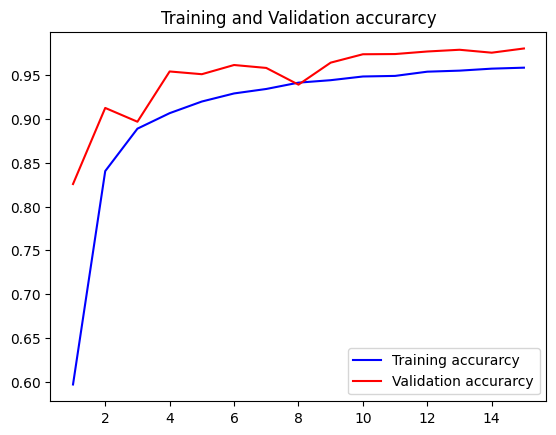

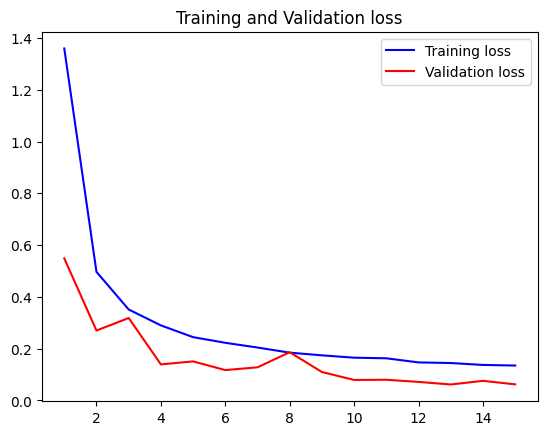

In [35]:
accuracy = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Evaluate model using unseen data.

In [36]:
score, accuracy = model.evaluate(test_generator, verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {:.2f}%".format(accuracy * 100))


550/550 [==============================] - 150s 273ms/step - loss: 0.1071 - accuracy: 0.9678
Test score is 0.10705064237117767
Test accuracy is 96.78%


Saving Model.

In [37]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [38]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [39]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

Load Model.

In [2]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = {'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy'}

 

Convert Model To "tflite format."

In [52]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('crop.h5')

# Convert the Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("Crop.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\deepr\AppData\Local\Temp\tmpz345z3bc\assets


INFO:tensorflow:Assets written to: C:\Users\deepr\AppData\Local\Temp\tmpz345z3bc\assets


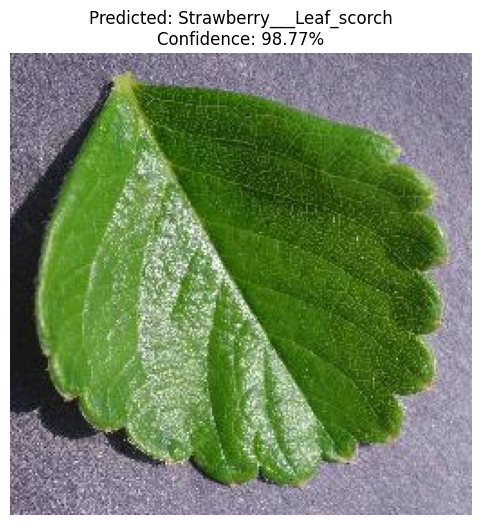

In [83]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the class names (same as before)
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']  # Your class names

# Load and preprocess the input image
img_path = "test images\Strawberry_Leaf_scorch.JPG"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the pixel values
input_img = np.expand_dims(img_array, axis=0)

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="final_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_img)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class_index = np.argmax(output_data)
predicted_class = class_names[predicted_class_index]
confidence = output_data[0][predicted_class_index] * 100.0

# Display the input image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
plt.axis("off")
plt.show()
